In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [90]:
import pandas as pd
import numpy as np
import matplotlib.backends.backend_pdf

pdf = matplotlib.backends.backend_pdf.PdfPages("ExcelFormattedGISTEMPData2CSV.pdf")

In [4]:
df=pd.read_csv("ExcelFormattedGISTEMPData2CSV.csv")

In [5]:
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-19,-33,-5,-38,-16,-5,-89,-54,-22,-26,-5,-2,-8,39
1,1881,-10,-18,-2,-27,-2,-5,-54,-40,-14,-5,2,-6,-3,37
2,1882,-9,-17,-1,-21,-10,4,-125,-20,-3,-12,-8,3,8,42
3,1883,-19,-30,-8,-34,-22,-2,-28,-57,-20,-25,-19,-1,0,37
4,1884,-27,-42,-12,-56,-17,-11,-127,-58,-41,-21,-14,-15,-5,40


In [6]:
df2=df[df.columns[1:]].head()

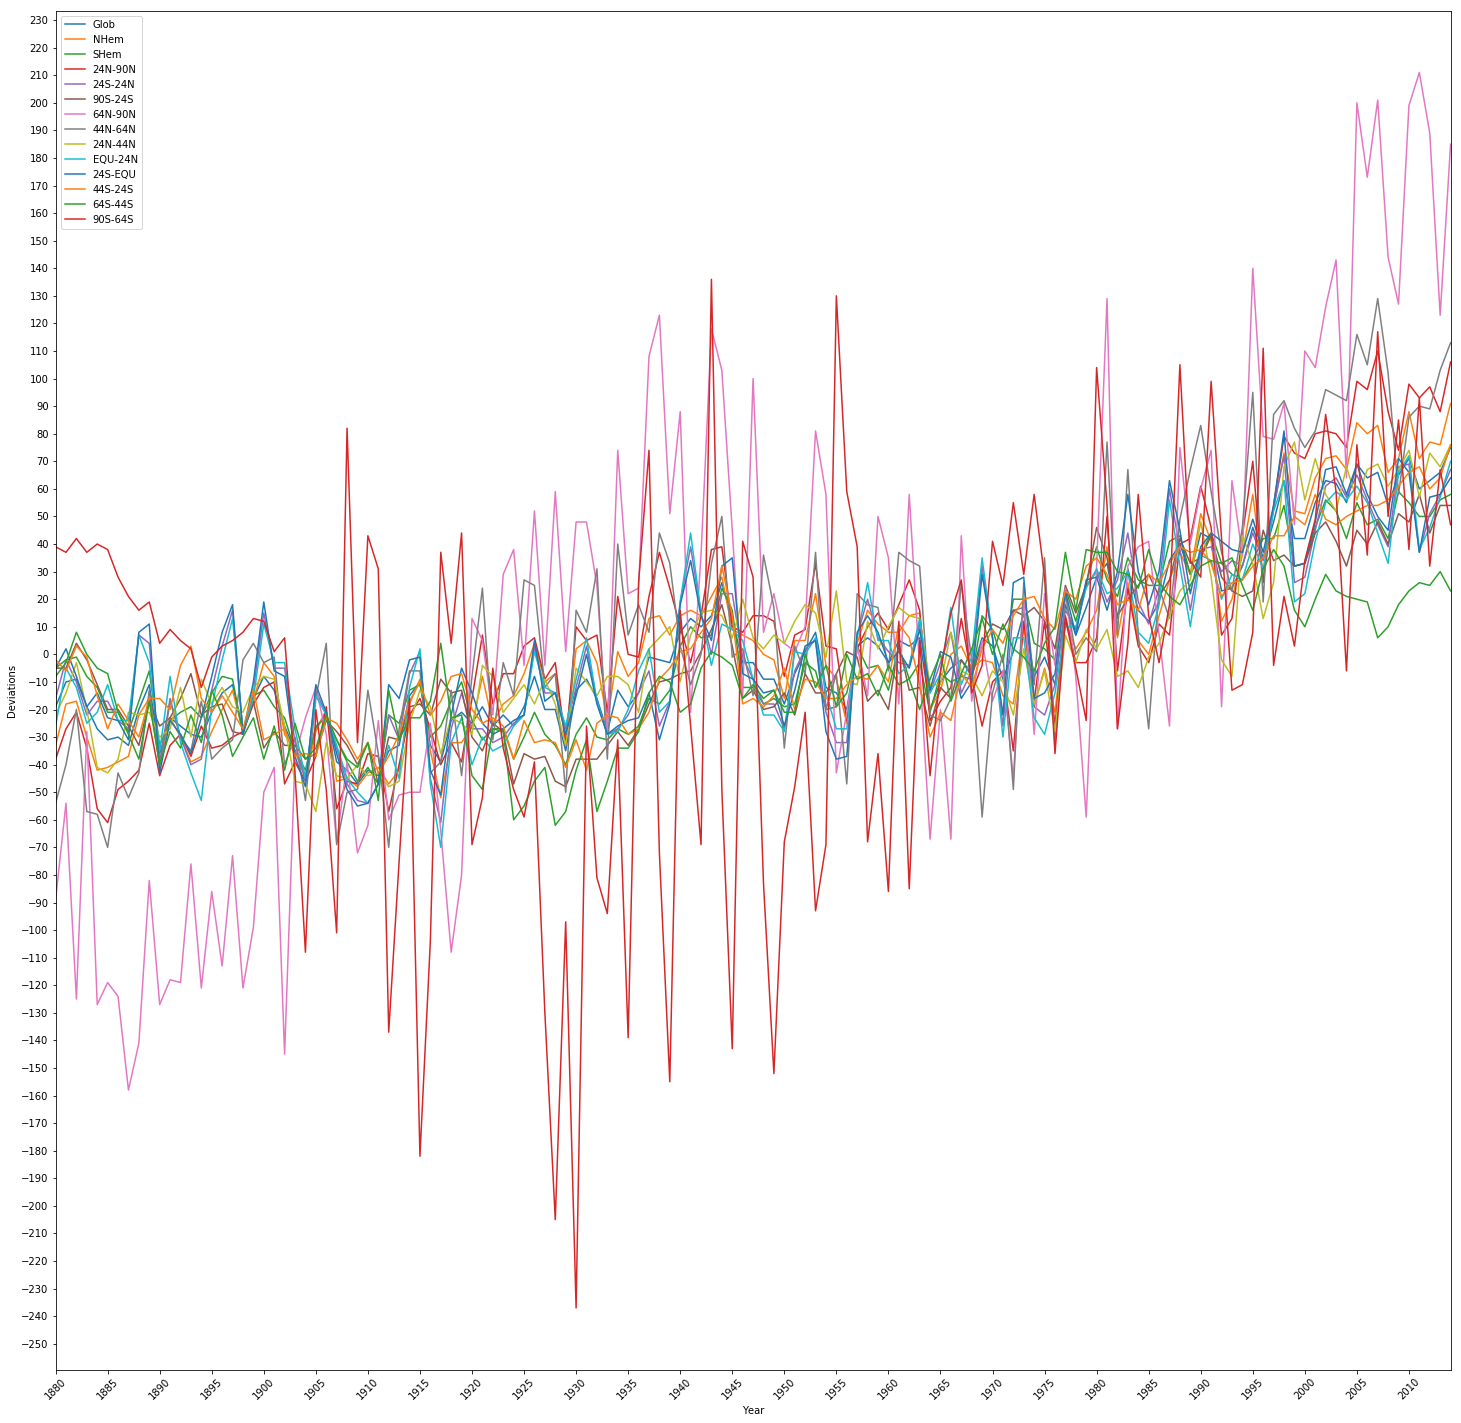

In [91]:
final_plt = df.plot(x=df['Year'],y=list(df.columns[1:]), legend=True, figsize=(25,25),xticks=list(df['Year']),
                    rot=45)
final_plt.set_xlabel("Year")
final_plt.set_ylabel("Deviations")
final_plt.xaxis.set_major_locator(ticker.MultipleLocator(5))
final_plt.yaxis.set_major_locator(ticker.MultipleLocator(10))


fig = final_plt.get_figure()
pdf.savefig(fig)
pdf.close()
#fig.savefig('figure_ExcelFormattedGISTEMPData2CSV.pdf')

In [78]:
type(final_plt)


matplotlib.axes._subplots.AxesSubplot

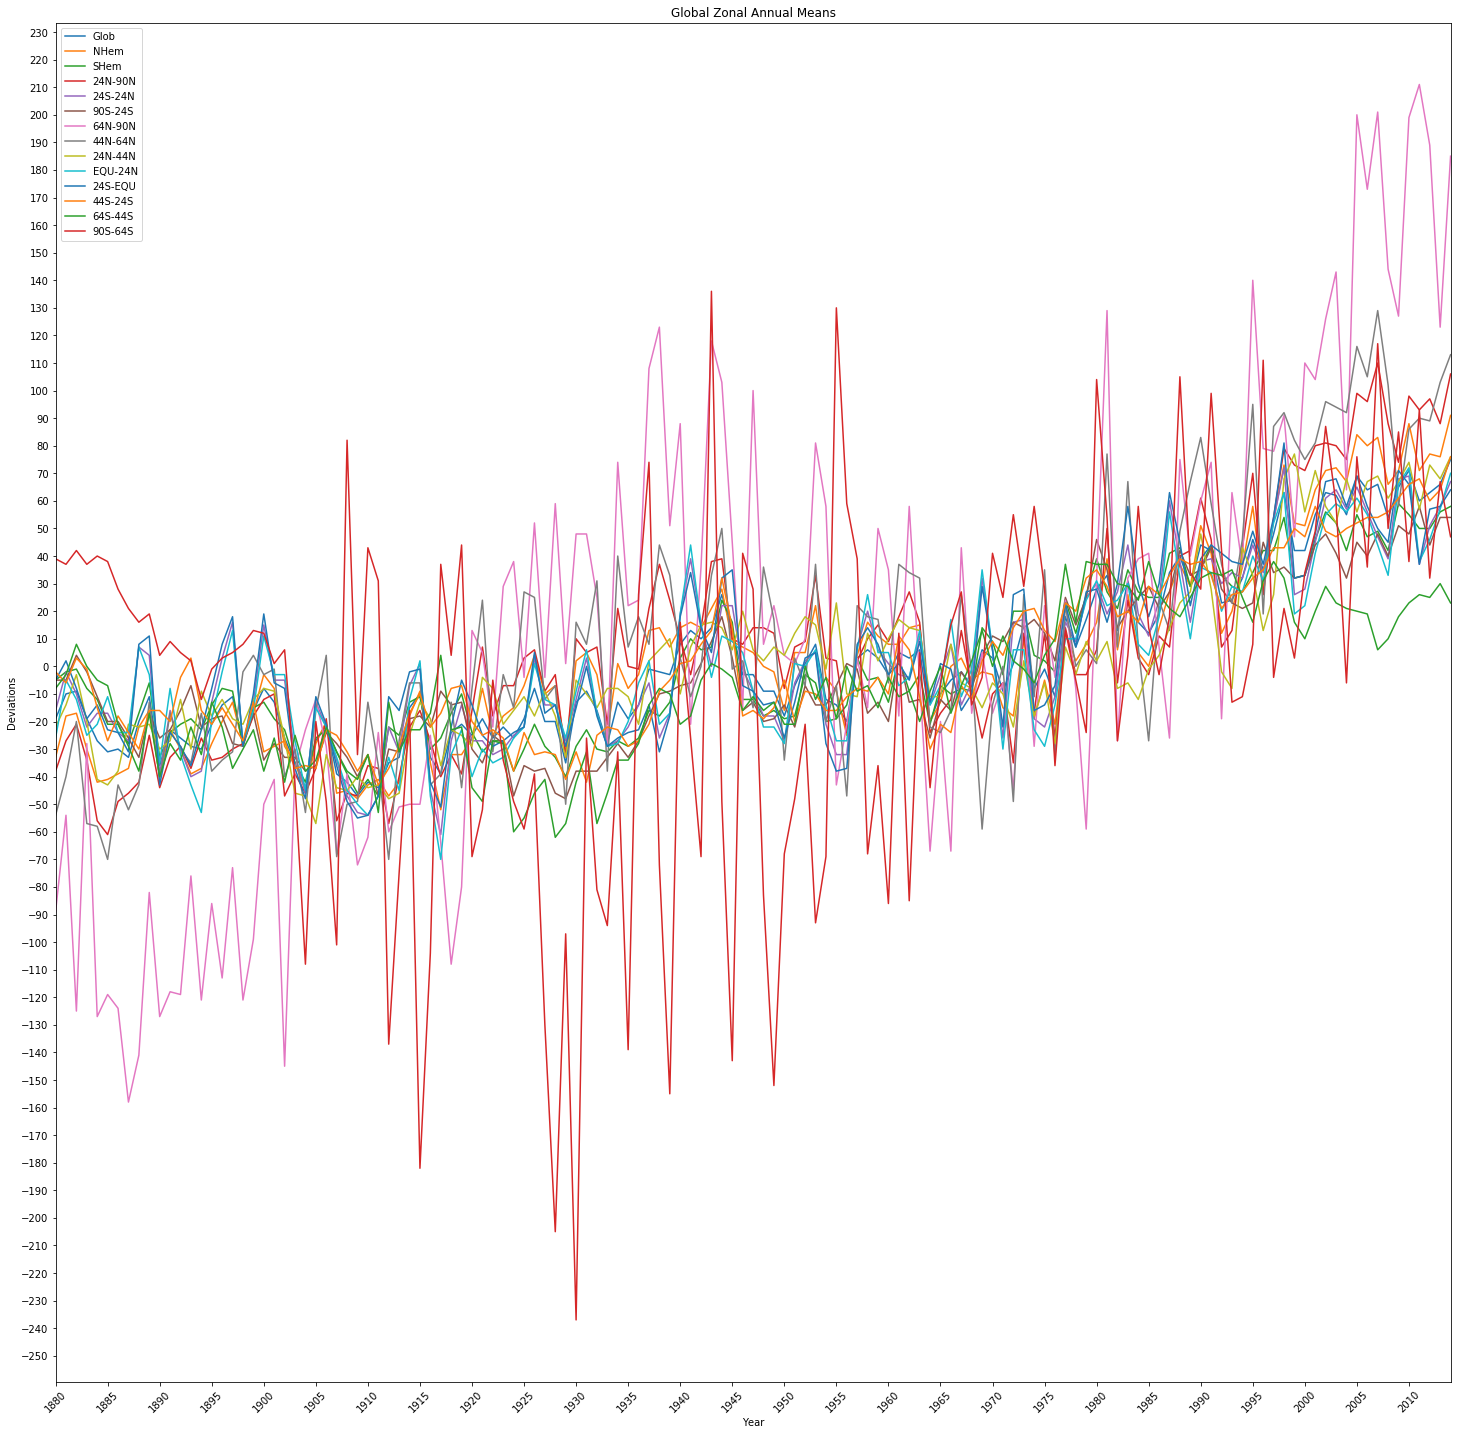

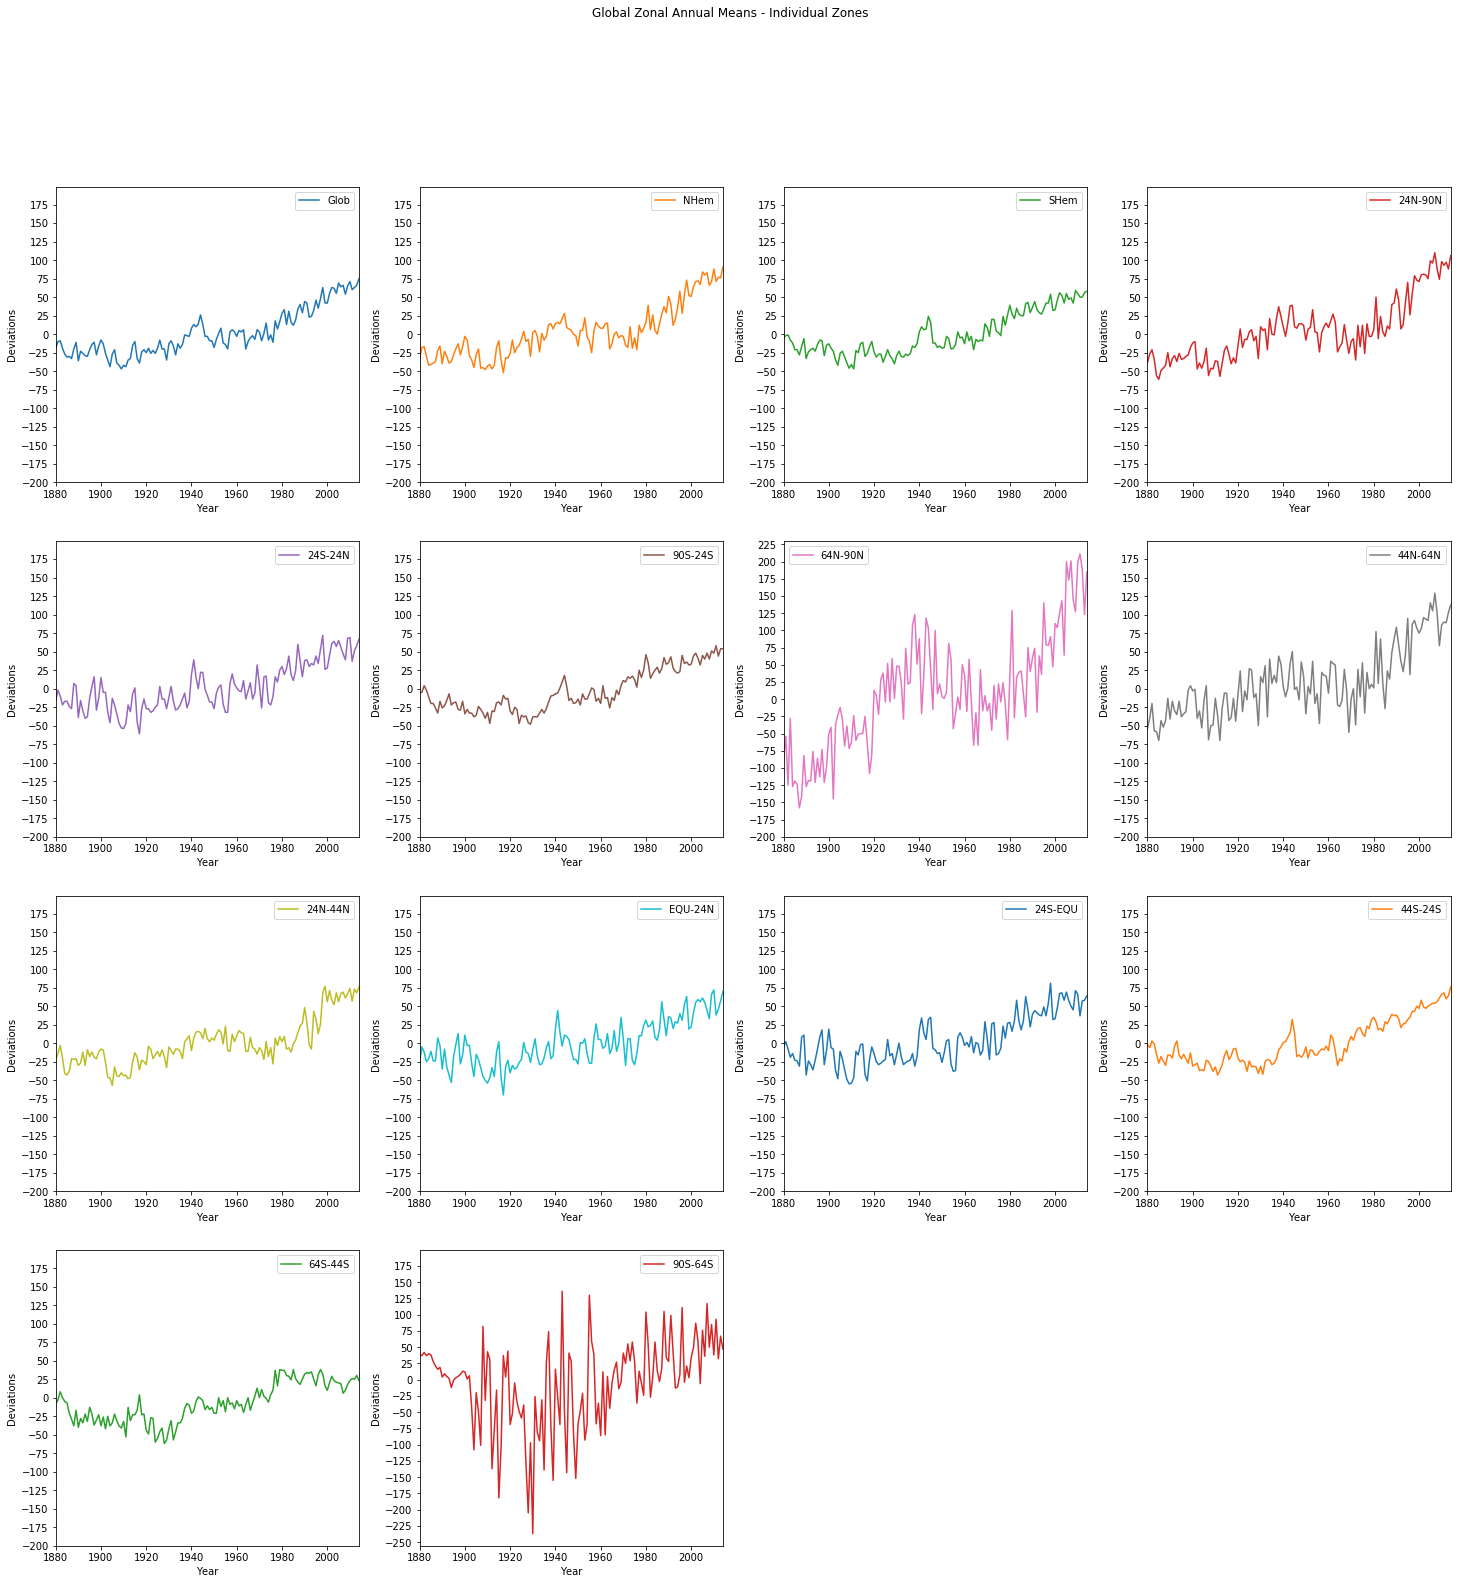

In [125]:
with matplotlib.backends.backend_pdf.PdfPages("ExcelFormattedGISTEMPData2CSV.pdf") as pdf:

    final_plt = df.plot(x=df['Year'],y=list(df.columns[1:]), legend=True, figsize=(25,25),xticks=list(df['Year']),
                        rot=45,title="Global Zonal Annual Means")
    final_plt.set_xlabel("Year")
    final_plt.set_ylabel("Deviations")
    final_plt.xaxis.set_major_locator(ticker.MultipleLocator(5))
    final_plt.yaxis.set_major_locator(ticker.MultipleLocator(10))
    
    fig = final_plt.get_figure()
    pdf.savefig(fig)

    final_plt2=df.plot(subplots=True,layout=(4,4),figsize=(25,25),
                       x='Year',sharex=False,sharey=False,
                       
                    
                )
    
    arr_ij = [(x,y) for x,y in np.ndindex(final_plt2.shape)]
    subplots=[final_plt2[index] for index in arr_ij]

    
    for splot in subplots:
        splot.axes.set_xlabel("Year")
        splot.axes.set_ylabel("Deviations")
        
        splot.axes.set_yticks(range(-200,200))
        splot.yaxis.set_major_locator(ticker.MultipleLocator(25))

    fig2 = final_plt2[0][0].get_figure()
    fig2.suptitle("Global Zonal Annual Means - Individual Zones")
    pdf.savefig(fig2)
    
  


In [127]:
df2 = pd.read_csv("ExcelFormattedGISTEMPDataCSV.csv")

df2.head()



,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16
1,1881,-8,-13,2,-2,-3,-27,-5,-1,-8,-18,-25,-14,-10,-11,-13,-1,-11,-17
2,1882,10,10,2,-19,-17,-24,-9,5,0,-21,-20,-24,-9,-8,2,-11,-9,-14
3,1883,-32,-41,-17,-23,-24,-11,-7,-12,-18,-11,-19,-17,-19,-20,-32,-22,-10,-16
4,1884,-17,-11,-33,-35,-31,-37,-33,-25,-22,-22,-30,-28,-27,-26,-15,-33,-32,-25


In [134]:
df2[df2.columns[0]]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-29,-19,-17,-27,-13,-28,-22,-6,-16,-15,-18,-20,-19,***,****,-19,-19,-16


In [170]:
df2.columns[0]
df2.columns[13:]

df21=df2[df2.columns[0:13]]
df22=df2.loc[:,['Year','J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']]

#df2[(list(df2.columns[13:]).append(df2.columns[0]))]

In [202]:
def ignore_exception(IgnoreException=Exception,DefaultVal=None):
    """ Decorator for ignoring exception from a function
    e.g.   @ignore_exception(DivideByZero)
    e.g.2. ignore_exception(DivideByZero)(Divide)(2/0)
    """
    def dec(function):
        def _dec(*args, **kwargs):
            try:
                return function(*args, **kwargs)
            except IgnoreException:
                return DefaultVal
        return _dec
    return dec

sint = ignore_exception(ValueError)(int)

In [217]:
df21.head()
df22.columns[1:]

df22['D-N'] = df22['D-N'].apply(lambda x:sint(x))
df22['J-D'] = df22['J-D'].apply(lambda x:sint(x))
df22['DJF'] = df22['DJF'].apply(lambda x:sint(x))
df22['MAM'] = df22['MAM'].apply(lambda x:sint(x))
df22['JJA'] = df22['JJA'].apply(lambda x:sint(x))
df22['SON'] = df22['SON'].apply(lambda x:sint(x))


for col in list(df21.columns[1:]):
    print(col)
    df21[col] = df21[col].apply(lambda x:sint(x))

#type(df22['D-N'][0])

Jan


/home/shalini/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec


In [218]:
df21['Jan']

0     -29
1      -8
2      10
3     -32
4     -17
5     -64
6     -41
7     -65
8     -42
9     -19
10    -46
11    -45
12    -24
13    -67
14    -54
15    -43
16    -22
17    -22
18     -7
19    -17
20    -39
21    -28
22    -18
23    -27
24    -63
25    -37
26    -29
27    -43
28    -44
29    -69
       ..
106    30
107    36
108    57
109    16
110    40
111    42
112    45
113    37
114    31
115    51
116    27
117    33
118    61
119    48
120    26
121    45
122    74
123    72
124    58
125    72
126    57
127    97
128    27
129    62
130    73
131    50
132    45
133    67
134    74
135    82
Name: Jan, Length: 136, dtype: int64

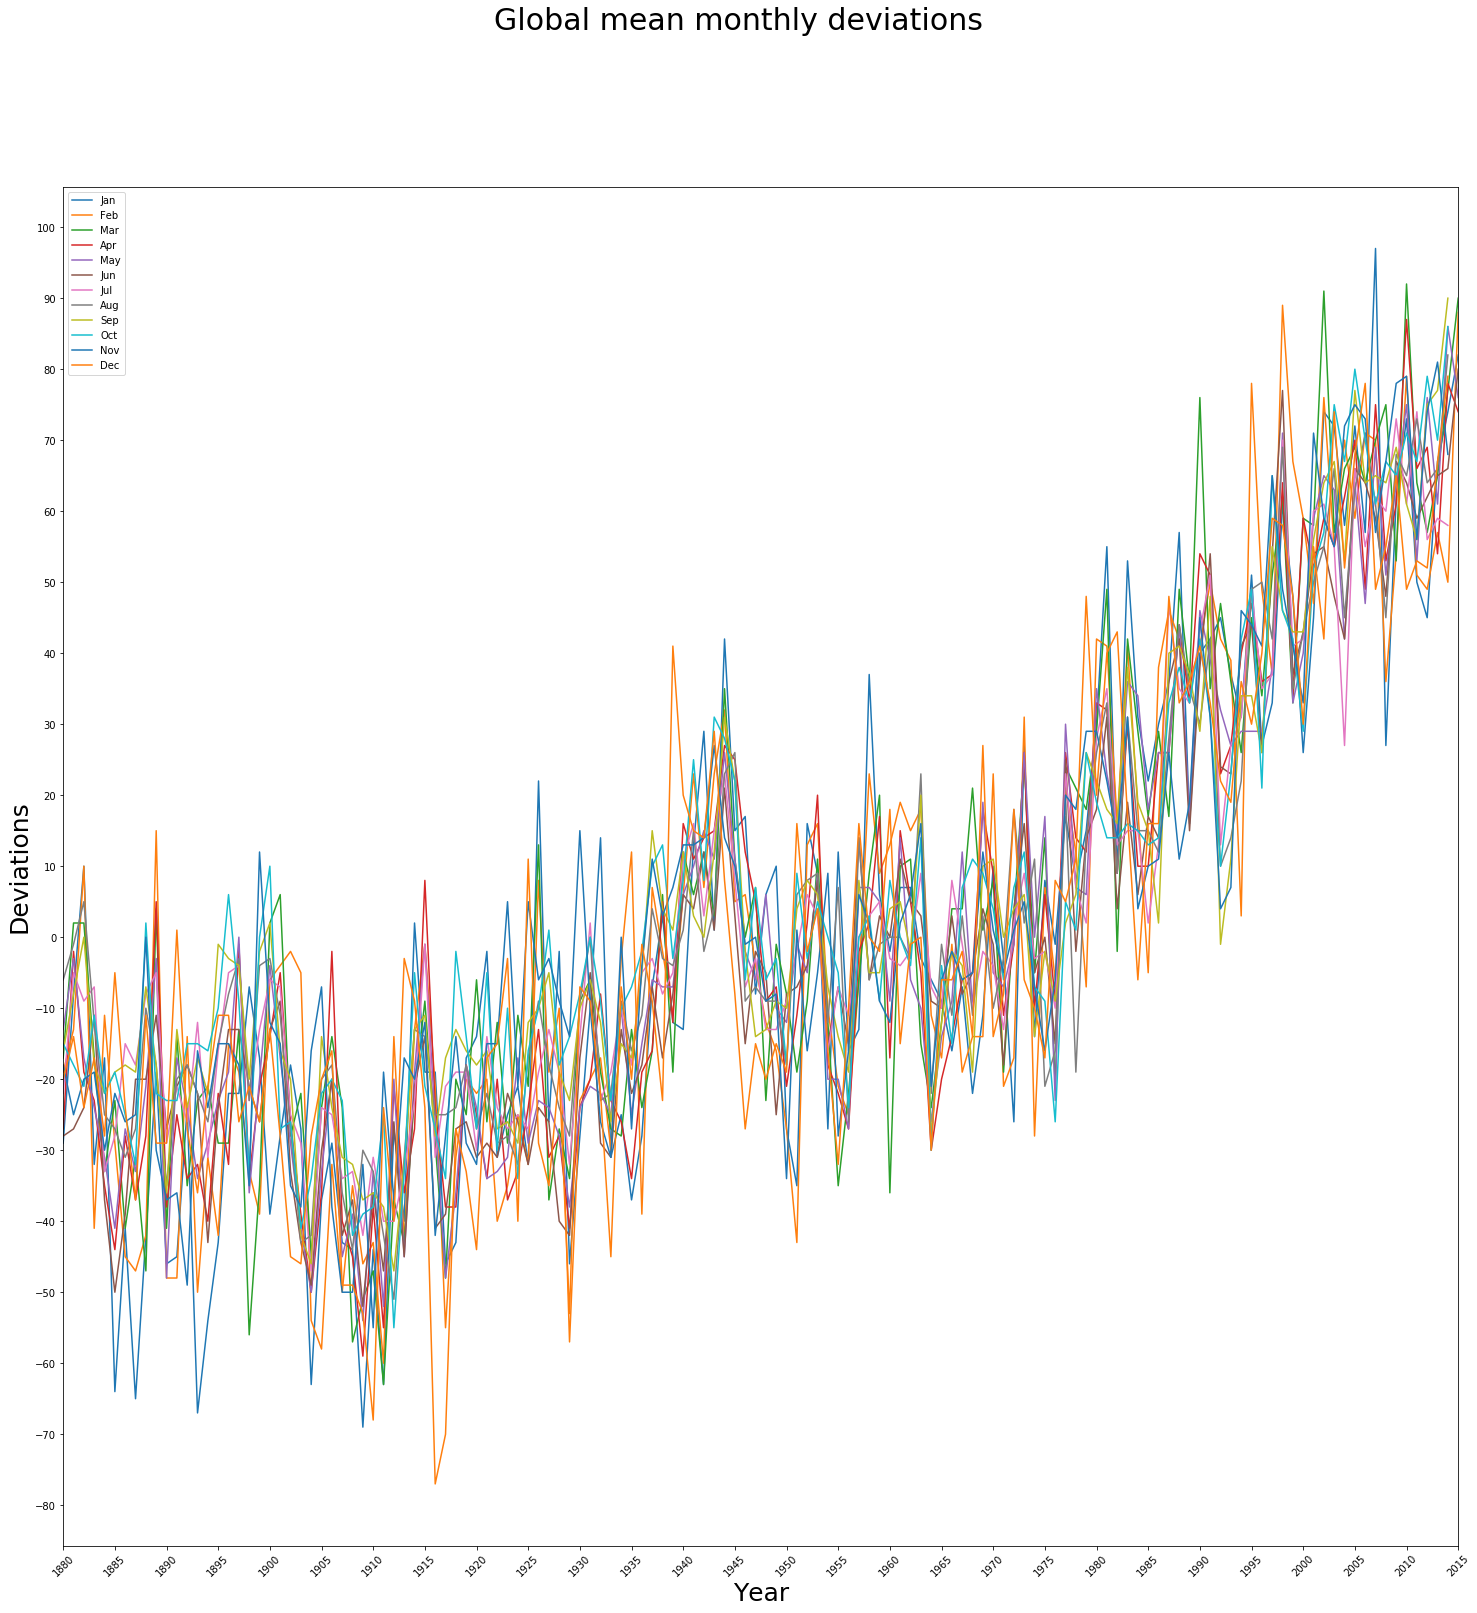

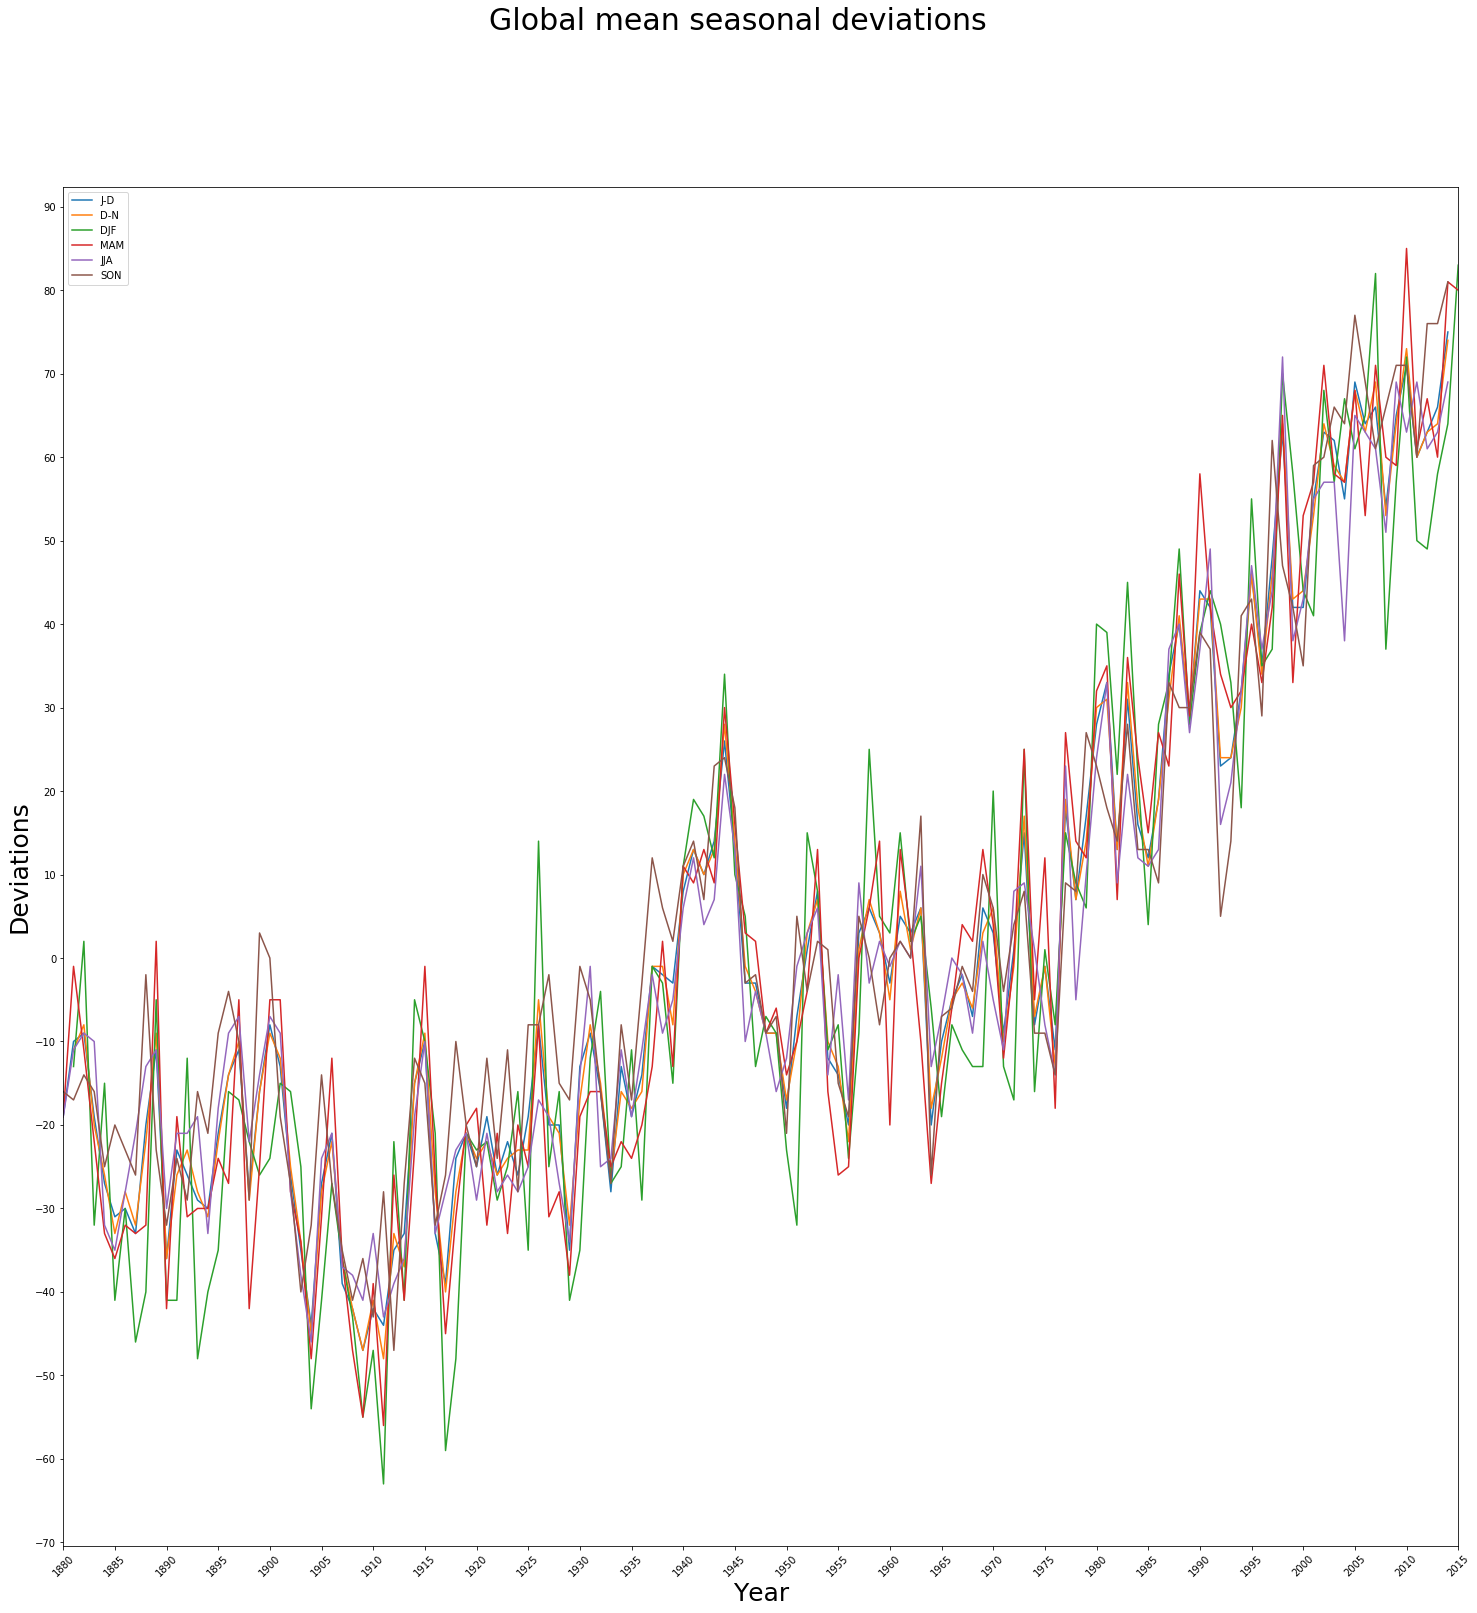

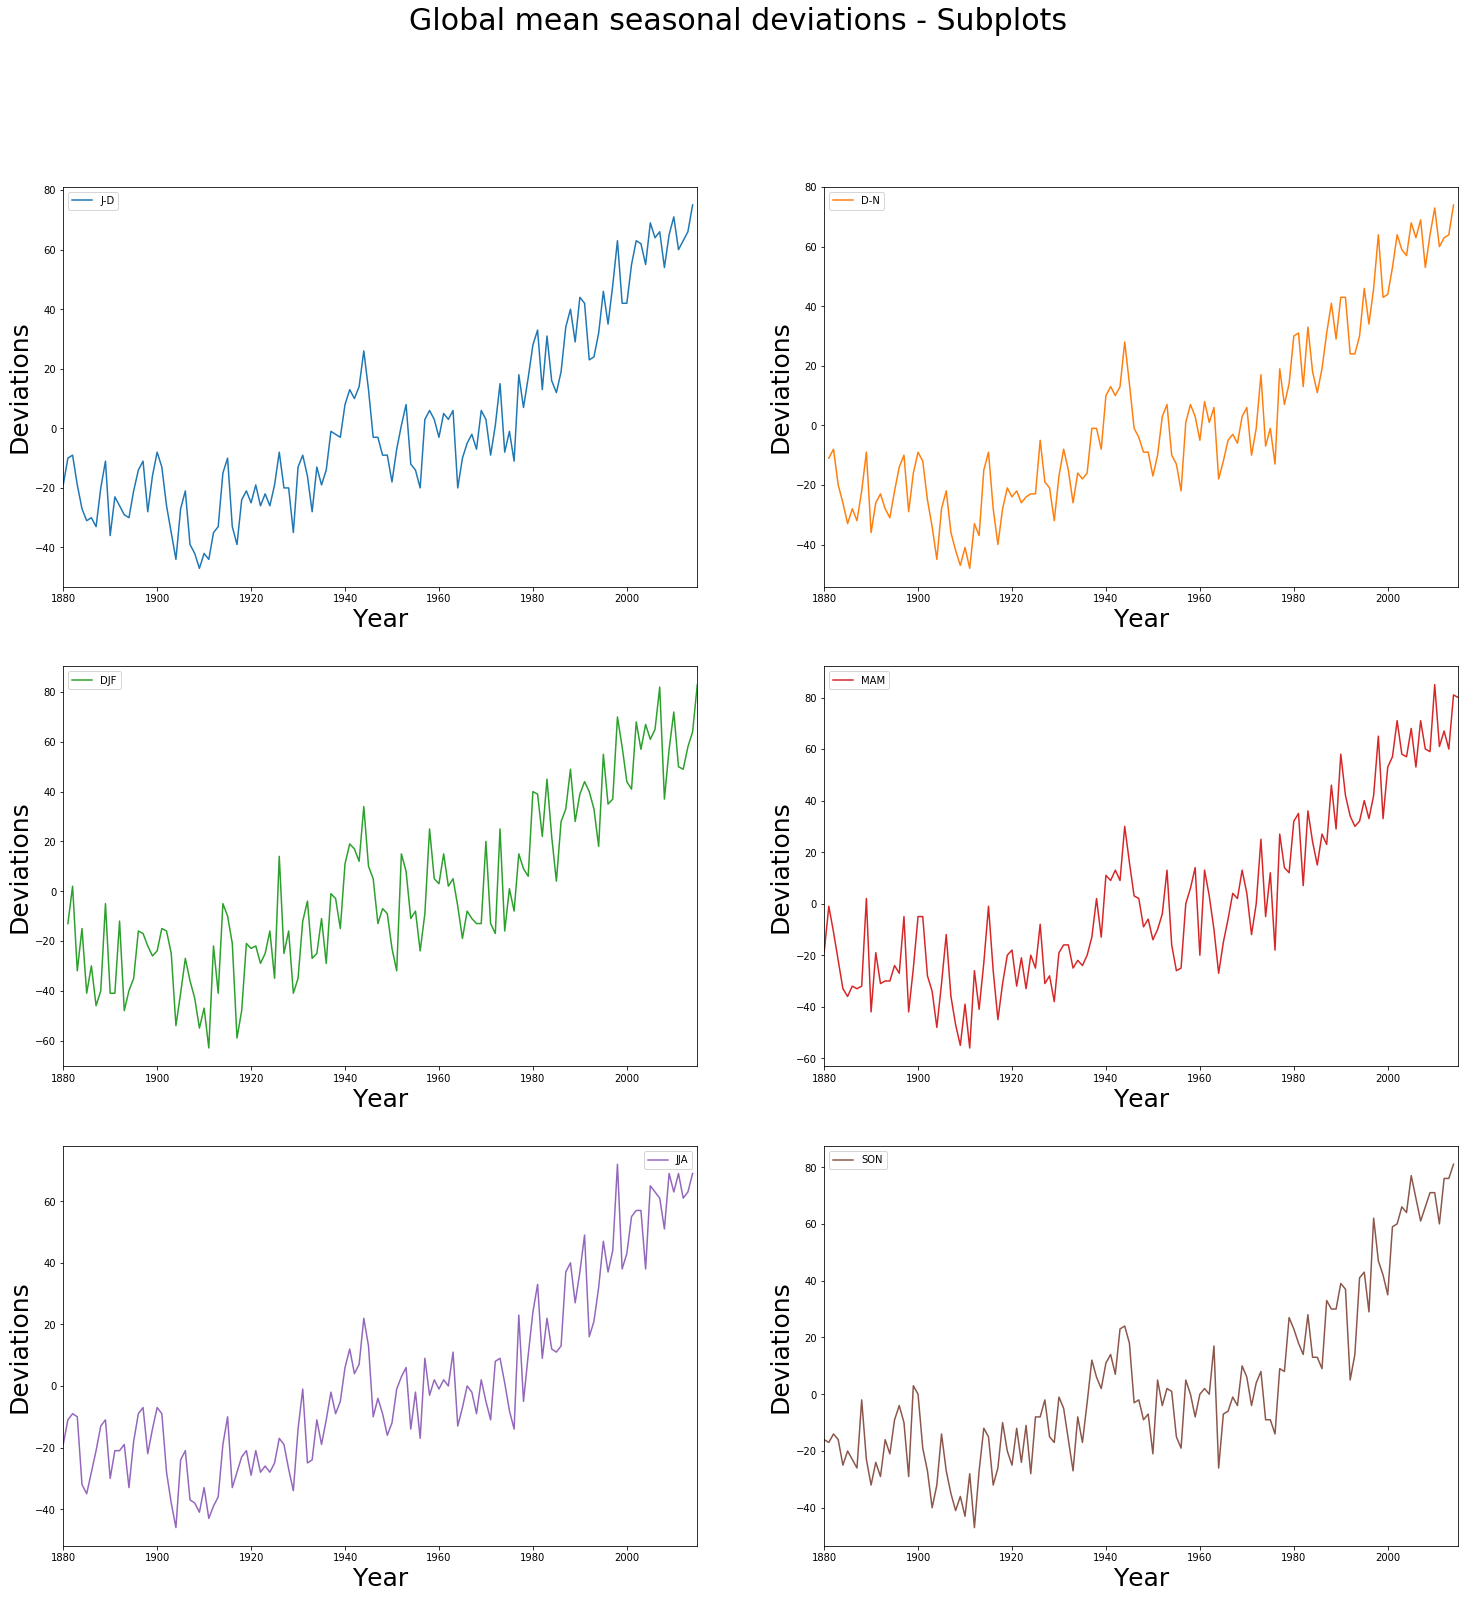

In [228]:
with matplotlib.backends.backend_pdf.PdfPages("ExcelFormattedGISTEMPDataCSV.pdf") as pdf:
    plt = df21.plot(rot=45,legend=True,x='Year',y=df21.columns[1:]
                   ,figsize=(25,25))

    plt.set_xlabel('Year', fontsize=25)
    plt.set_ylabel('Deviations', fontsize=25)

    plt.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.yaxis.set_major_locator(ticker.MultipleLocator(10))
    fig1  = plt.get_figure()
    fig1.suptitle("Global mean monthly deviations", fontsize=30)
    pdf.savefig(fig1)

    plt2 = df22.plot(rot=45,legend=True,x='Year',y=df22.columns[1:]
                   ,figsize=(25,25))

    plt2.set_xlabel('Year', fontsize=25)
    plt2.set_ylabel('Deviations', fontsize=25)

    plt2.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    
    fig2  = plt2.get_figure()
    fig2.suptitle("Global mean seasonal deviations", fontsize=30)
    pdf.savefig(fig2)

    plt3 = df22.plot(figsize=(25,25),legend=True,
                     x='Year', sharex=False, sharey=False, subplots=True, layout=(3,2))

    ax_arr = [(i,j) for i,j in np.ndindex(plt3.shape)]
    subplots = [plt3[idx] for idx in ax_arr]

    for splot in subplots:
        splot.set_xlabel('Year', fontsize=25)
        splot.set_ylabel('Deviations', fontsize=25)
        
    fig3  = plt3[0][0].get_figure()
    fig3.suptitle("Global mean seasonal deviations - Subplots", fontsize=30)
    pdf.savefig(fig3)
    
    

